# SLU04 - Basic Stats with Pandas: Exercises notebook

In these exercises we'll use a real dataset about house prices in King County in the US to learn how to obtain basic statistics from the data. This dataset comes from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction).


## Objectives

In these exercises the objective is for you to learn how to use pandas to obtain simple statistics of datasets.

## Dataset information

![](https://hookedonhouses.net/wp-content/uploads/2013/08/Capitol-Hill-Seattle-house-for-sale-E-Ward.jpg)

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The columns in the dataset are the following:

- `id`: a notation for a house
- `date`: Date house was sold
- `price`: Price is prediction target
- `bedrooms`: Number of Bedrooms/House
- `bathrooms`: Number of bathrooms/House
- `sqft_living`: square footage of the home
- `sqft_lot`: square footage of the lot
- `floors`: total floors in house
- `waterfront`: house which has a view to a waterfront
- `view`: has been viewed
- `condition`: how good the condition is (overall)
- `grade`: overall grade given to the housing unit, based on King County grading system
- `sqft_above`: square footage of house apart from basement
- `sqft_basements`: quare footage of the basement
- `yr_built`: built Year
- `yr_renovated`: Year when house was renovated
- `zipcode`: zip
- `lat`: latitude coordinate
- `long`: longitude coordinate
- `sqft_living15`: Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area
- `sqft_lot15`: lotSize area in 2015 (implies-- some renovations)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import hashlib  # this is used to validate an answer, if you don't have it do !pip3 install hashlib

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


----

# Exercise 1 

Ok, let's start with very basic statistics.
 - How much is the most expensive house? What is its `id`?
 - How much is the cheapest house? What is its `id`?

In [3]:
# price_most_expensive = ...
# id_most_expensive = ...
# price_cheapest = ...
# id_cheapest =
# YOUR CODE HERE
price_most_expensive = data.price.max()
id_most_expensive = data.loc[data.price.idxmax(),'id']
price_cheapest = data.price.min()
id_cheapest =  data.loc[data.price.idxmin(),'id']


##### Asserts 

In [4]:
assert price_most_expensive == 7700000.0
assert id_most_expensive == 6762700020
assert price_cheapest == 75000.0
assert id_cheapest == 3421079032

---

# Exercise 2 

Let's check the number of bedrooms.
- What is the maximum and minimum number of bedrooms in the dataset?
- What is the most common number of bedrooms?
- What is the average number of bedrooms?
- What is the median?
- What is the standard deviation?

In [5]:
# maximum = ...
# minimum = ...
# most_common = ...  # Hint: you should return a number, not a pandas Series :)
# average = ...
# median = ...
# standard_deviation = ...

# YOUR CODE HERE
maximum = data.bedrooms.max()
minimum = data.bedrooms.min()
most_common = data.bedrooms.mode()[0]
average = data.bedrooms.mean()
median = data.bedrooms.median()
standard_deviation = data.bedrooms.std()

##### Asserts 

In [6]:
assert maximum == 33
assert minimum == 0
assert most_common == 3
assert math.isclose(average, 3.37, abs_tol = 0.01)
assert median == 3
assert math.isclose(standard_deviation, 0.93, abs_tol = 0.01)

----

# Exercise 3 

In the previous exercise, you calculated some basic statistics for the number of bedrooms of the houses in the dataset. Have a look at the numbers you got again.
 - Are the minimum and maximum close to the mean and median?
 - Is the median smaller or larger than the mean? Did you expect that?
 - Given your answers to the questions above, do you expect the distribution of the number of bedrooms to be skewed? If so, do you expect it to be positively or negatively skewed?
 
Plot two histograms for the number of bedrooms, one with 10 bins and another with 30 bins. Can you visually confirm if the distribution is skewed?

Compute the skewness measure for the number of bedrooms. Is it positive or negative?

The skewness measure is 1.974.


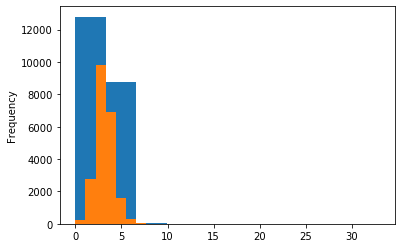

In [7]:
## plot two histograms, side-by-side
# plt.figure(1, figsize=(12,4), dpi=200)
# plt.subplot(121)
## plot first histogram
# ...
# plt.subplot(122)
## plot first histogram
# ...

## compute skew measure
# skew = ...

# YOUR CODE HERE
plt1 = data.bedrooms.plot.hist(bins = 10)
plt2 = data.bedrooms.plot.hist(bins = 30)
skew = data.bedrooms.skew()

print("The skewness measure is {:.3f}.".format(skew))

##### Asserts 

In [8]:
assert math.isclose(skew, 1.974, abs_tol=0.001)

---

# Exercise 4 

Now let's look at the area of the homes and compare it to the area of the homes excluding the basement.
 - Do you expect the distributions of the areas to be skewed? If so, positively or negatively?
 - Which of the distributions do you expect to have more kurtosis (i.e., a longer "tail")? Why?
 
Verify the answers to the questions above by plotting a histogram (with 30 bins) for each of the distributions and by computing the skewness and kurtosis measures for each.

In [9]:
# plt.figure(1, figsize=(12,4), dpi=200)
# plt.subplot(121)
# ...
# plt.subplot(122)
# ...
# skew_living = ...
# skew_above = ...
# kurt_living = ...
# kurt_above = ...

# YOUR CODE HERE
skew_living = data.sqft_living.skew()
skew_above = data.sqft_above.skew()
kurt_living = data.sqft_living.kurt()
kurt_above = data.sqft_above.kurt()


print("The skewness measure for the area of the home distribution is {:.3f}.".format(skew_living))
print("The skewness measure for the area minus the basement distribution is {:.3f}.".format(skew_above))
print("The kurtosis measure for the area of the home distribution is {:.3f}.".format(kurt_living))
print("The kurtosis measure for the area minus the basement distribution is {:.3f}.".format(kurt_above))

The skewness measure for the area of the home distribution is 1.472.
The skewness measure for the area minus the basement distribution is 1.447.
The kurtosis measure for the area of the home distribution is 5.243.
The kurtosis measure for the area minus the basement distribution is 3.402.


##### Asserts 

In [10]:
assert(math.isclose(skew_living, 1.472, abs_tol=0.01))
assert(math.isclose(skew_above, 1.447, abs_tol=0.01))
assert(math.isclose(kurt_living, 5.243, abs_tol=0.01))
assert(math.isclose(kurt_above, 3.402, abs_tol=0.01))

---

# Exercise 5  

Find the quartiles of the area of the home and the area of the home minus basement. 

In [11]:
# output quartiles as pandas Seroes
# living_quartiles = ...
# above_quartiles = ...

# YOUR CODE HERE
quartiles = [0.0, 0.25, 0.5, 0.75, 1.0]
living_quartiles = data.sqft_living.quantile(q=quartiles)
above_quartiles = data.sqft_above.quantile(q=quartiles)
display(pd.Series({'Area of home Quantiles': living_quartiles, 
                      'Area minus basement Quantiles': above_quartiles}))

Area of home Quantiles           0.00      290.0
0.25     1427.0
0.50     1910....
Area minus basement Quantiles    0.00     290.0
0.25    1190.0
0.50    1560.0
0...
dtype: object

##### Asserts 

In [12]:
assert (living_quartiles.sum() == 19717)
assert (above_quartiles.sum() == 14660)
assert list(living_quartiles.index) == [0.0, 0.25, 0.5, 0.75, 1.0]

---

# Exercise 6 

In this exercise, obtain:
* a list of all the years during which the houses were built;
* a list of all the years during which the houses were renovated.

*Reminder: none of the houses in this dataset was built and/or renovated when Jesus Christ was born.*

In [13]:
# list_years_built = ...
# list_years_renovated = ...

# YOUR CODE HERE
list_years_built = data.yr_built.unique()
list_years_built = list_years_built.tolist()
list_years_renovated = data.yr_renovated.unique()
list_years_renovated.tolist()
list_years_renovated = [i for i in list_years_renovated if i != 0]

##### Asserts 

In [14]:
assert isinstance(list_years_built, (list,))
assert len(list_years_built) == 116
assert isinstance(list_years_renovated, (list,))
assert len(list_years_renovated) == 69

----

# Exercise 7 

In Exercise 4, we saw that the area of the homes had a skewed distribution, with certainly a few outliers (*really huge houses!*).

Let's plot the histogram for the area again.

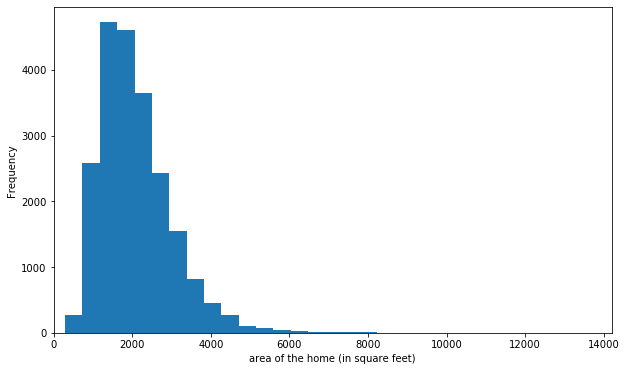

In [15]:
data.sqft_living.plot.hist(bins=30, figsize=(10,6));
plt.xlim(0);
plt.xlabel('area of the home (in square feet)');

How to deal with the outliers?

In the Learning Notebook, you learned a few ways to deal with the outliers, in case they are negatively affecting your Machine Learning models. In this exercise, let's explore the **log transformation** and see if it helps us in this case.

Do the following:
* obtain the mean and the median of the areas of the homes; which one is greater?
* create a new field called `log_sqrt_living` with the log of the areas;
* obtain the mean and the median of the log of the areas; are they very different from each other?
* obtain the skewness measure for the distribution of the log of the areas; how does it compare to the one you obtained in Exercise 4?
* plot an histogram with 30 bins of the log of the areas.

What do you think? Were the outliers dealt with? How about the skewness of the distribution?

The home areas have mean 2079.9 and median 1910.0
The log of areas have mean 7.550 and median 7.555
The distribution of log of areas have a skewness measure of -0.035


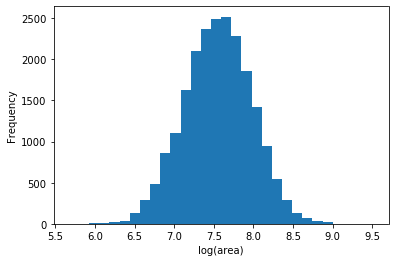

In [16]:
## Compute mean and median of the areas of the homes
# area_mean = ...
# area_median = ...
## Create new field called `log_sqrt_living` with the log of the areas
# ...
## Compute mean and median of the log of the areas
# log_area_mean = ...
# log_area_median = ...
## Compute the skewness measure of the distribution of the log of the areas
# log_area_skew = ...
## Plot an histogram (with 30 bins) of the log of the areas
## For the x-axis, have the label 'log(area)'
# ...

# YOUR CODE HERE
area_mean = data.sqft_living.mean()
area_median = data.sqft_living.median()
log_sqrt_living = np.log(data.sqft_living)
data['log_sqft_living'] = log_sqrt_living
log_area_mean  = log_sqrt_living.mean()
log_area_median = log_sqrt_living.median()
log_area_skew = log_sqrt_living.skew()
log_sqrt_living.plot.hist(bins=30)
plt.xlabel('log(area)')
print('The home areas have mean %0.1f and median %0.1f' % (area_mean, area_median))
print('The log of areas have mean %0.3f and median %0.3f' % (log_area_mean, log_area_median))
print('The distribution of log of areas have a skewness measure of %0.3f' % log_area_skew)

##### Asserts 

In [17]:
assert math.isclose(area_mean, 2079.9, abs_tol=0.1)
assert math.isclose(area_median, 1910.0, abs_tol=0.1)
assert math.isclose(log_area_mean, 7.55, abs_tol=0.01)
assert math.isclose(log_area_median, 7.55, abs_tol=0.01)
assert math.isclose(log_area_skew, -0.035, abs_tol=0.001)
assert math.isclose(data['log_sqft_living'].sum(), 163185.38, abs_tol=0.1)

----